# Section 13

### Acccuracy Paradox
- Sometimes you can simply say that all the answers are TRUE and the model will be better than a more robust model

### Cumulative Accuracy Profile
- You draw two graphs. 
- One if sort of the standard, the prob. of the majority
- Then we graph our prob. which is more robust because we build a model
- <img src="./images/AZ-13.png" alt="Drawing" style="width: 200px;"/>
- The model is better if there's a greater area between both graphs
- This is also called the GAINED model!
- The linear graph is something anyone can do, a simply guess
- The greater the area becomes a better model
- <img src="./images/AZ-13_2.png" alt="Drawing" style="width: 200px;"/>
- CAP
- ROC: Reciever Operating Characteristics
- These are not the same!

### CAP Analysis (Check Excel as well)
- <img src="./images/AZ-13_3.png" alt="Drawing" style="width: 200px;"/>
- The Second method uses the 50% line
     - If the vertical interception is less than 60% - **Rubbish**
     - If the vertical interception is between 60% and 70% - **Poor**
     - If the vertical interception is between 70% and 80% - **Good**
     - If the vertical interception is between 80% and 90% - **Very Good**
     - If the vertical interception is between 90% and 100% - **Too Good**

In [7]:
### FEATUREs THAT WE WILL BE USING FOR THE MODELS
### Index(['CreditScore', 'Age', 'NumOfProducts', 'IsActiveMember', 'Female',
### 'Germany', 'Log_Balance'],
###

In [8]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as sm
from statsmodels.api import add_constant

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import BackwardElimination

PATH = '/Users/alexguanga/Downloads/'

/Users/alexguanga/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
df_test = pd.read_csv(PATH+"Churn-Modelling-Test-Data.csv")
df_train = pd.read_csv(PATH+"Churn-Modelling.csv")

In [10]:
gender_dummy = pd.get_dummies(df_train['Gender'])
df_train = pd.concat([df_train, gender_dummy], axis=1)
df_train.drop(['Gender', 'Male'], axis=1, inplace=True) 

df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1


In [11]:
geo_dummy = pd.get_dummies(df_train['Geography'])
df_train = pd.concat([df_train, geo_dummy], axis=1)
df_train.drop(['Geography', 'France'], axis=1, inplace=True) 

df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Germany,Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1


In [12]:
features = df_train[['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard',
                     'IsActiveMember','EstimatedSalary','Female','Germany','Spain']]

y = df_train['Exited']


In [13]:
VARS_FOR_MODELS = ['CreditScore','Age','Balance','NumOfProducts','IsActiveMember','Female','Germany']
features_2 = df_train[VARS_FOR_MODELS]

df_train['Log_Balance'] = np.log(df_train['Balance'] + 1)


In [14]:
# Replacing log for balance instead

features_2 = pd.concat([features_2,df_train['Log_Balance']], axis=1)
features_2.drop('Balance',axis=1, inplace=True)


In [15]:
Xmat = add_constant(features_2)
logit = sm.Logit(y, Xmat)

# fit the model
model_2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.428401
         Iterations 6


In [16]:
y_predict = model_2.predict(Xmat)
results_df = pd.DataFrame({'Exited': df_train['Exited'], 
                        'Prediction':y_predict})

results_df.to_csv("Churning_Predictions.csv")

Performing the test on the testing set

In [17]:
gender_dummy = pd.get_dummies(df_test['Gender'])
df_test = pd.concat([df_test, gender_dummy], axis=1)
df_test.drop(['Gender', 'Male'], axis=1, inplace=True) 

geo_dummy = pd.get_dummies(df_test['Geography'])
df_test = pd.concat([df_test, geo_dummy], axis=1)
df_test.drop(['Geography', 'France'], axis=1, inplace=True) 

df_test['Log_Balance'] = np.log(df_test['Balance'] + 1)

y = df_test['Exited']

df_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Germany,Spain,Log_Balance
0,10001,15798485,Copley,565,31,1,0.00,1,0,1,20443.08,0,0,0,0,0.000000
1,10002,15588959,T'ang,569,34,4,0.00,1,0,1,4045.90,0,0,0,0,0.000000
2,10003,15624896,Ku,669,20,7,0.00,2,1,0,128838.67,0,1,0,0,0.000000
3,10004,15639629,McConnan,694,39,4,173255.48,1,1,1,81293.10,0,0,0,0,12.062528
4,10005,15638852,Ts'ui,504,28,10,109291.36,1,1,1,187593.15,0,0,0,1,11.601782


In [18]:
Xmat = add_constant(df_test[features_2.columns])
logit = sm.Logit(y, Xmat)

# fit the model
model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.496876
         Iterations 6


In [19]:
y_test_predict = model.predict(Xmat)

results_df = pd.DataFrame({'Exited': df_test['Exited'], 
                        'Prediction':y_test_predict})
results_df.to_csv("Churning_Predictions_TEST.csv")

In [20]:
results_df.head()

,Exited,Prediction
0,0,0.059826
1,0,0.073093
2,0,0.095728
3,0,0.153224
4,0,0.066682


In [21]:
print(metrics.confusion_matrix(results_df.Exited, y_test_predict.round()))

[[701  39]
 [201  59]]


In [37]:
import Capcurve

In [47]:
import importlib
importlib.reload(Capcurve)

<module 'Capcurve' from '/Users/alexguanga/All_Projects/Data-Science/All-Data-Science/OC-AZ-DataScience/ClassNotes/Capcurve.py'>

In [49]:
capcurve = Capcurve.CapCurve(results_df)
capcurve.head()

,index,Exited,Prediction,Total_Records,Total_Percent,Random_Select,Random_Select_Percent,Model_Select,Model_Select_Percent
0,209,1,0.864569,1,0.001,0.26,0.001,1,0.003846
1,957,1,0.855257,2,0.002,0.52,0.002,2,0.007692
2,626,1,0.837776,3,0.003,0.78,0.003,3,0.011538
3,944,1,0.837267,4,0.004,1.04,0.004,4,0.015385
4,997,0,0.834109,5,0.005,1.30,0.005,4,0.015385


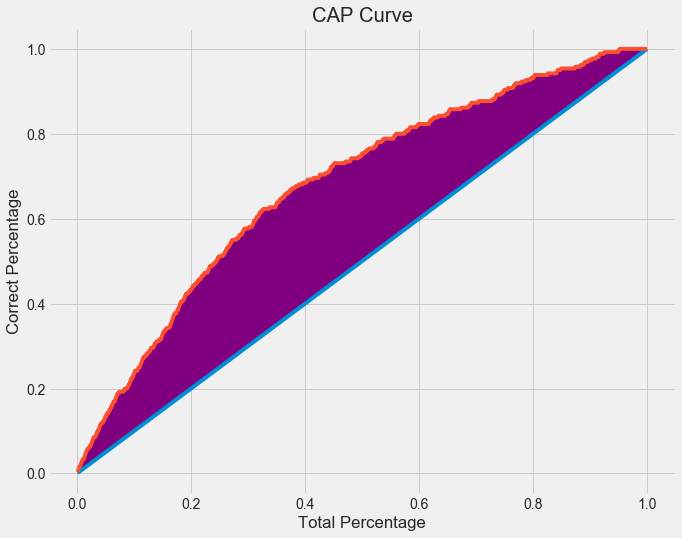

In [50]:
Capcurve.PlotCapCurve(results_df)